In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data = pd.read_csv ("E:\machine learning/diabetes.csv")
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
x = pd.DataFrame(data,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values 
y = data.Outcome
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [6]:
K = 5
clf = KNeighborsClassifier(K)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [7]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7489177489177489


In [8]:
K = 3
clf = KNeighborsClassifier(K)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6926406926406926


In [10]:
K = 10
clf = KNeighborsClassifier(K)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7532467532467533


In [12]:
# CREAT LOOP TO AVOID THESE PROCESS

In [13]:
K = 20
Acc = np.zeros((K))
for i in range(1,K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test,y_pred)
    
Acc

array([0.61471861, 0.71428571, 0.69264069, 0.73593074, 0.74891775,
       0.74025974, 0.74891775, 0.74891775, 0.74891775, 0.75324675,
       0.75324675, 0.75324675, 0.74891775, 0.74891775, 0.75757576,
       0.74458874, 0.74458874, 0.73593074, 0.72727273, 0.72727273])

In [14]:
print (np.max(Acc))
print (np.min(Acc))

0.7575757575757576
0.6147186147186147


In [15]:
# another way

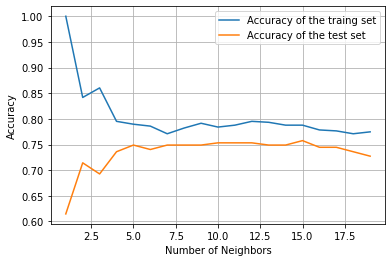

In [16]:
training_acc = []
test_acc = []

#try KNN for different k nearest from 1 to 20
neighbor_setting = range(1,20)

for n_neighbors in neighbor_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))
    
plt.plot(neighbor_setting,training_acc, label='Accuracy of the traing set')
plt.plot(neighbor_setting,test_acc, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel("Number of Neighbors")
plt.grid()
plt.legend()

In [17]:
# improve model

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
parameters = {"n_neighbors": range(1,50)}
grid_kn = GridSearchCV(estimator = knn, #model
                      param_grid = parameters, #Range of k
                      scoring = 'accuracy', 
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)

grid_kn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [20]:
grid_kn.best_params_

{'n_neighbors': 11}